In [1]:
import pickle
import matplotlib.pyplot as plt
import math
import numpy

plt.rcParams.update({"text.usetex": True,"font.family": "serif"})
plt.rcParams['text.latex.preamble'] = [
    r'\usepackage{amsmath}',
    r'\usepackage{amssymb}']

from matplotlib.lines import Line2D

In [2]:
jobNameA = 'spectra_Experiment_A'
jobNameB = 'spectra_Experiment_B'
jobNameC = 'spectra_Experiment_C'

In [3]:
with open(jobNameA + ".pkl", 'rb') as f:
    dataA = pickle.load(f, encoding="latin1")
with open(jobNameB + ".pkl", 'rb') as f:
    dataB = pickle.load(f, encoding="latin1")
with open(jobNameC + ".pkl", 'rb') as f:
    dataC = pickle.load(f, encoding="latin1")

In [5]:
powersA = dataA['powersFid'][0]
powersB = dataB['powersFid'][1]
powersC = dataC['powersFid'][2]

ells = powersB['unlensed']['l']
lmaxToPlot = 5000
lminToPlot = 0

In [10]:
noiseA = dataA['cmbNoiseSpectra'][0]
noiseB = dataB['cmbNoiseSpectra'][1]
noiseC = dataC['cmbNoiseSpectra'][2]

In [11]:
polCombsToPlot = ['dl_TT','dl_TE','dl_EE','dl_BB']
polCombsPretty = ['$\mathcal{D}_{\ell}^{TT}$ [$\mu\mathrm{K}^2$]','$\mathcal{D}_{\ell}^{TE}$ [$\mu\mathrm{K}^2$]', \
                  '$\mathcal{D}_{\ell}^{EE}$ [$\mu\mathrm{K}^2$]','$\mathcal{D}_{\ell}^{BB}$ [$\mu\mathrm{K}^2$]']
delCombsPretty = ['$\Delta \mathcal{D}_{\ell}^{TT}$ [$\mu\mathrm{K}^2$]','$\Delta \mathcal{D}_{\ell}^{TE}$ [$\mu\mathrm{K}^2$]', \
                  '$\Delta \mathcal{D}_{\ell}^{EE}$ [$\mu\mathrm{K}^2$]','$\Delta \mathcal{D}_{\ell}^{BB}$ [$\mu\mathrm{K}^2$]']
nPlots = 2
colors = ['C9', 'C8', 'C6', 'C2', 'C4']
widths = [2]
linestyles = ['-','-.']

<Figure size 432x288 with 0 Axes>

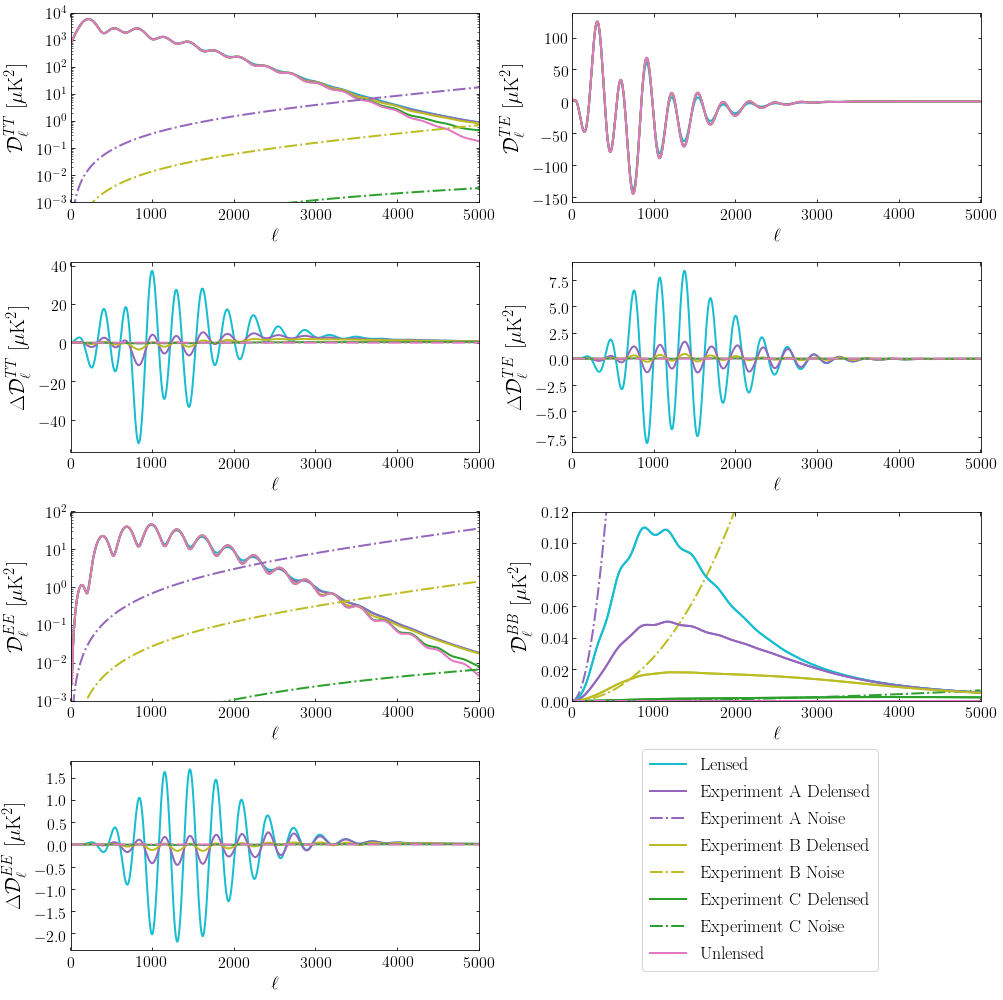

In [12]:
plt.clf()
fig = plt.figure(figsize=(14,14))

lminToPlot = 0

plotNoise = True

for pc, polComb in enumerate(polCombsToPlot):
    if pc%2 == 0:
        # even
        i = pc*2+1
        ax = plt.subplot(nPlots*2, nPlots, i)
        ax.tick_params(direction="in",top=True,right=True)
        ax.get_yaxis().set_tick_params(which='minor', direction='in',right=True) 
        ax.margins(0.0,0.05)
        if polComb == 'dl_EE':
            plt.ylim(bottom = 0.001, top = 100)
        if polComb == 'dl_TT':
            plt.ylim(bottom = 0.001, top = 10000)
        if polComb == 'dl_TE' or polComb == 'cl_TE' or polComb == 'dl_BB' or polComb == 'cl_BB':
            plt.plot(ells[lminToPlot:lmaxToPlot],powersB['lensed'][polComb][lminToPlot:lmaxToPlot], label='lensed', \
                         color = colors[0], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],powersA['delensed'][polComb][lminToPlot:lmaxToPlot], label='A delensed', \
                         color = colors[4], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],powersB['delensed'][polComb][lminToPlot:lmaxToPlot], label='B delensed', \
                         color = colors[1], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],powersC['delensed'][polComb][lminToPlot:lmaxToPlot], label='C delensed', \
                         color = colors[3], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],powersB['unlensed'][polComb][lminToPlot:lmaxToPlot], label='unlensed', \
                         color = colors[2], linewidth = widths[0], linestyle = linestyles[0])
        else:
            plt.semilogy(ells[lminToPlot:lmaxToPlot],powersB['lensed'][polComb][lminToPlot:lmaxToPlot], label='lensed', \
                     color = colors[0], linewidth = widths[0], linestyle = linestyles[0])
            plt.semilogy(ells[lminToPlot:lmaxToPlot],powersA['delensed'][polComb][lminToPlot:lmaxToPlot], label='A delensed', \
                     color = colors[4], linewidth = widths[0], linestyle = linestyles[0])
            plt.semilogy(ells[lminToPlot:lmaxToPlot],powersB['delensed'][polComb][lminToPlot:lmaxToPlot], label='B delensed', \
                         color = colors[1], linewidth = widths[0], linestyle = linestyles[0])
            plt.semilogy(ells[lminToPlot:lmaxToPlot],powersC['delensed'][polComb][lminToPlot:lmaxToPlot], label='C delensed', \
                         color = colors[3], linewidth = widths[0], linestyle = linestyles[0])
            plt.semilogy(ells[lminToPlot:lmaxToPlot],powersB['unlensed'][polComb][lminToPlot:lmaxToPlot], label='unlensed', \
                         color = colors[2], linewidth = widths[0], linestyle = linestyles[0])
            if plotNoise:
                if polComb == 'dl_TT' or polComb == 'dl_EE':
                    plt.semilogy(ells[lminToPlot:lmaxToPlot],noiseA[polComb][lminToPlot:lmaxToPlot], label='A noise', \
                             color = colors[4], linewidth = widths[0], linestyle = linestyles[1])
                    plt.semilogy(ells[lminToPlot:lmaxToPlot],noiseB[polComb][lminToPlot:lmaxToPlot], label='B noise', \
                             color = colors[1], linewidth = widths[0], linestyle = linestyles[1])
                    plt.semilogy(ells[lminToPlot:lmaxToPlot],noiseC[polComb][lminToPlot:lmaxToPlot], label='C noise', \
                             color = colors[3], linewidth = widths[0], linestyle = linestyles[1])
        plt.xlabel('$\ell$',fontsize=18)
        plt.ylabel(polCombsPretty[pc],fontsize=21)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)

        ax = plt.subplot(nPlots*2, nPlots, i+2)
        ax.tick_params(direction="in",top=True,right=True)
        ax.margins(0.0,0.05)
        plt.plot(ells[lminToPlot:lmaxToPlot],powersB['lensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot], \
                 label='lensed', \
                     color = colors[0], linewidth = widths[0], linestyle = linestyles[0])
        plt.plot(ells[lminToPlot:lmaxToPlot],powersA['delensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot], \
                 label='A delensed', \
                     color = colors[4], linewidth = widths[0], linestyle = linestyles[0])
        plt.plot(ells[lminToPlot:lmaxToPlot],powersB['delensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot], \
                 label='B delensed', \
                     color = colors[1], linewidth = widths[0], linestyle = linestyles[0])
        plt.plot(ells[lminToPlot:lmaxToPlot],powersC['delensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot], \
                 label='C delensed', \
                     color = colors[3], linewidth = widths[0], linestyle = linestyles[0])
        plt.plot(ells[lminToPlot:lmaxToPlot],powersB['unlensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot], \
                 label='unlensed', \
                     color = colors[2], linewidth = widths[0], linestyle = linestyles[1])
        plt.xlabel('$\ell$',fontsize=18)
        plt.ylabel(delCombsPretty[pc],fontsize=21)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
    else:
        # odd
        i = pc*2
        ax = plt.subplot(nPlots*2, nPlots, i)
        ax.tick_params(direction="in",top=True,right=True)
        ax.get_yaxis().set_tick_params(which='minor', direction='in',right=True) 
        ax.margins(0.0,0.05)
        if polComb == 'dl_TE' or polComb == 'cl_TE' or polComb == 'dl_BB' or polComb == 'cl_BB':
            plt.plot(ells[lminToPlot:lmaxToPlot],powersB['lensed'][polComb][lminToPlot:lmaxToPlot], label='lensed', \
                         color = colors[0], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],powersA['delensed'][polComb][lminToPlot:lmaxToPlot], label='A delensed', \
                         color = colors[4], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],powersB['delensed'][polComb][lminToPlot:lmaxToPlot], label='B delensed', \
                         color = colors[1], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],powersC['delensed'][polComb][lminToPlot:lmaxToPlot], label='C delensed', \
                         color = colors[3], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],powersB['unlensed'][polComb][lminToPlot:lmaxToPlot], label='unlensed', \
                         color = colors[2], linewidth = widths[0], linestyle = linestyles[0])
            if plotNoise:
                if polComb == 'dl_BB':
                    plt.plot(ells[lminToPlot:lmaxToPlot],noiseA[polComb][lminToPlot:lmaxToPlot], label='A noise', \
                             color = colors[4], linewidth = widths[0], linestyle = linestyles[1])
                    plt.plot(ells[lminToPlot:lmaxToPlot],noiseB[polComb][lminToPlot:lmaxToPlot], label='B noise', \
                             color = colors[1], linewidth = widths[0], linestyle = linestyles[1])
                    plt.plot(ells[lminToPlot:lmaxToPlot],noiseC[polComb][lminToPlot:lmaxToPlot], label='C noise', \
                             color = colors[3], linewidth = widths[0], linestyle = linestyles[1])
        else:
            plt.semilogy(ells[lminToPlot:lmaxToPlot],powersB['lensed'][polComb][lminToPlot:lmaxToPlot], label='lensed', \
                     color = colors[0], linewidth = widths[0], linestyle = linestyles[0])
            plt.semilogy(ells[lminToPlot:lmaxToPlot],powersA['delensed'][polComb][lminToPlot:lmaxToPlot], label='A delensed', \
                     color = colors[4], linewidth = widths[0], linestyle = linestyles[0])
            plt.semilogy(ells[lminToPlot:lmaxToPlot],powersB['delensed'][polComb][lminToPlot:lmaxToPlot], label='B delensed', \
                         color = colors[1], linewidth = widths[0], linestyle = linestyles[0])
            plt.semilogy(ells[lminToPlot:lmaxToPlot],powersC['delensed'][polComb][lminToPlot:lmaxToPlot], label='C delensed', \
                         color = colors[3], linewidth = widths[0], linestyle = linestyles[0])
            plt.semilogy(ells[lminToPlot:lmaxToPlot],powersB['unlensed'][polComb][lminToPlot:lmaxToPlot], label='unlensed', \
                         color = colors[2], linewidth = widths[0], linestyle = linestyles[0])
            if plotNoise:
                if polComb == 'dl_TT' or polComb == 'dl_EE':
                    plt.semilogy(ells[lminToPlot:lmaxToPlot],noiseA[polComb][lminToPlot:lmaxToPlot], label='A noise', \
                             color = colors[4], linewidth = widths[0], linestyle = linestyles[1])
                    plt.semilogy(ells[lminToPlot:lmaxToPlot],noiseB[polComb][lminToPlot:lmaxToPlot], label='B noise', \
                             color = colors[1], linewidth = widths[0], linestyle = linestyles[1])
                    plt.semilogy(ells[lminToPlot:lmaxToPlot],noiseC[polComb][lminToPlot:lmaxToPlot], label='C noise', \
                             color = colors[3], linewidth = widths[0], linestyle = linestyles[1])
        plt.xlabel('$\ell$',fontsize=18)
        plt.ylabel(polCombsPretty[pc],fontsize=21)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)

        if polComb != 'dl_BB':
            ax = plt.subplot(nPlots*2, nPlots, i+2)
            ax.tick_params(direction="in",top=True,right=True)
            ax.margins(0.0,0.05)
            plt.plot(ells[lminToPlot:lmaxToPlot],powersB['lensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot], \
                     label='lensed', \
                         color = colors[0], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],powersA['delensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot], \
                     label='A delensed', \
                         color = colors[4], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],powersB['delensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot], \
                     label='B delensed', \
                         color = colors[1], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],powersC['delensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot], \
                     label='C delensed', \
                         color = colors[3], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],powersB['unlensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot], \
                     label='unlensed', \
                         color = colors[2], linewidth = widths[0], linestyle = linestyles[1])
            plt.xlabel('$\ell$',fontsize=18)
            plt.ylabel(delCombsPretty[pc],fontsize=21)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
        if polComb == 'dl_BB':
            plt.ylim(bottom = 0.0, top = 0.12)
            plt.plot(ells[lminToPlot:lmaxToPlot],powersB['lensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot], \
                     label='lensed', \
                         color = colors[0], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],powersA['delensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot], \
                     label='Experiment A delensed', \
                         color = colors[4], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],powersB['delensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot], \
                     label='Experiment B delensed', \
                         color = colors[1], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],powersC['delensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot], \
                     label='Experiment C delensed', \
                         color = colors[3], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],powersB['unlensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot], \
                     label='unlensed', \
                         color = colors[2], linewidth = widths[0], linestyle = linestyles[1])
            plt.xlabel('$\ell$',fontsize=18)
            plt.ylabel(polCombsPretty[pc],fontsize=21)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)

labels = ['Lensed', \
          'Experiment A Delensed', 'Experiment A Noise', \
          'Experiment B Delensed', 'Experiment B Noise', \
          'Experiment C Delensed', 'Experiment C Noise', \
          'Unlensed']
custom_lines = [Line2D([0], [0], ls=linestyles[0], color=colors[0], lw=2),
                Line2D([0], [0], ls=linestyles[0], color=colors[4], lw=2),
                Line2D([0], [0], ls=linestyles[1], color=colors[4], lw=2),
                Line2D([0], [0], ls=linestyles[0], color=colors[1], lw=2),
                Line2D([0], [0], ls=linestyles[1], color=colors[1], lw=2),
                Line2D([0], [0], ls=linestyles[0], color=colors[3], lw=2),
                Line2D([0], [0], ls=linestyles[1], color=colors[3], lw=2),
                Line2D([0], [0], ls=linestyles[0], color=colors[2], lw=2)]
fig.legend(custom_lines, labels, loc="lower right", fontsize=18, bbox_to_anchor=(0.88, 0.02))
plt.tight_layout()
plt.savefig('fig_spectra.pdf')
plt.show()

In [13]:
fracCombsPretty = ['$\\big\lvert {\Delta \mathcal{D}_{\ell}^{TT} / \mathcal{D}_{\ell}^{TT,\mathrm{u}}} \\big\\rvert$',\
                  '$\\big\lvert {\Delta \mathcal{D}_{\ell}^{TE} / \mathcal{D}_{\ell}^{TE,\mathrm{u}}} \\big\\rvert$',\
                  '$\\big\lvert {\Delta \mathcal{D}_{\ell}^{EE} / \mathcal{D}_{\ell}^{EE,\mathrm{u}}} \\big\\rvert$',\
                  '$\\big\lvert {\Delta \mathcal{D}_{\ell}^{BB} / \mathcal{D}_{\ell}^{BB,\mathrm{u}}} \\big\\rvert$']

<Figure size 432x288 with 0 Axes>

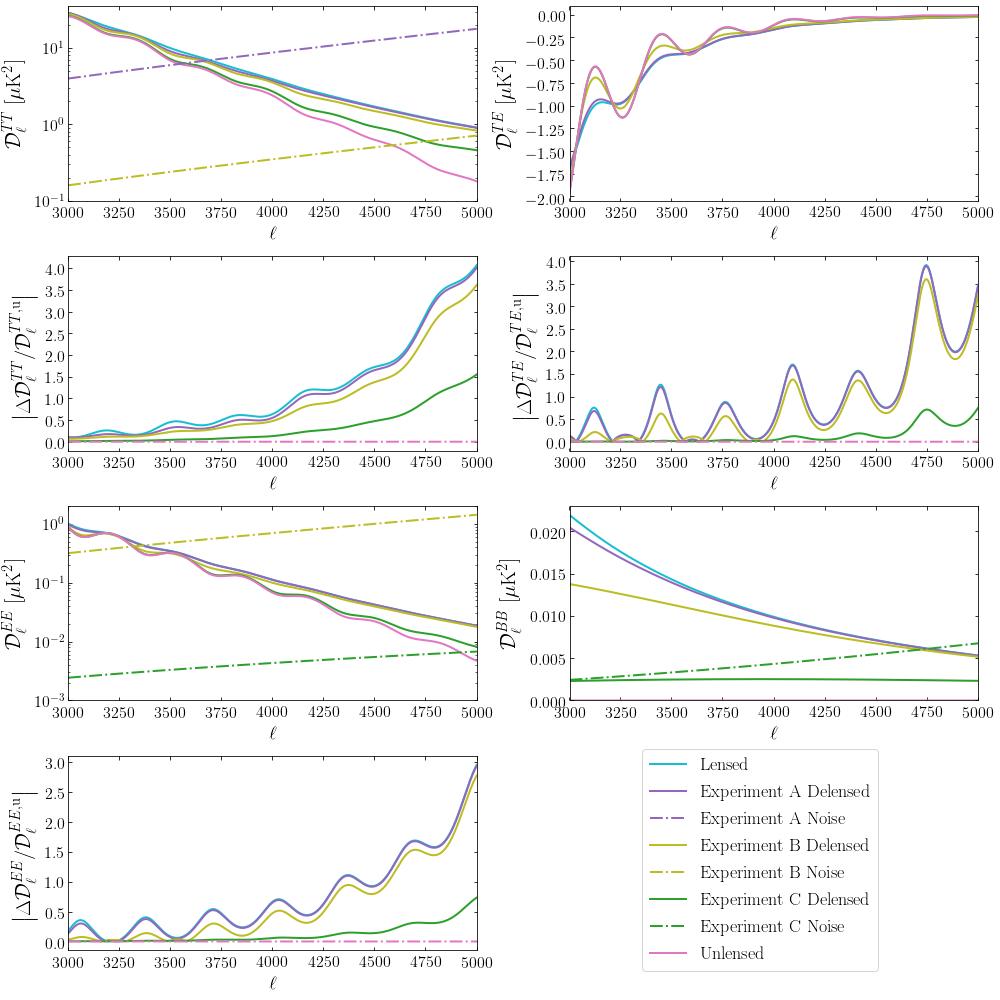

In [14]:
plt.clf()
fig = plt.figure(figsize=(14,14))

lminToPlot = 3000

plotNoise = True

for pc, polComb in enumerate(polCombsToPlot):
    if pc%2 == 0:
        # even
        i = pc*2+1
        ax = plt.subplot(nPlots*2, nPlots, i)
        ax.tick_params(direction="in",top=True,right=True)
        ax.get_yaxis().set_tick_params(which='minor', direction='in',right=True) 
        ax.margins(0.0,0.05)
        if polComb == 'dl_EE':
            plt.ylim(bottom = 0.001, top = 2)
        if polComb == 'dl_TT':
            plt.ylim(bottom = 0.1, top = 35)
        if polComb == 'dl_TE':
            plt.ylim(bottom = -2.0, top = 0.0)
        if polComb == 'dl_TE' or polComb == 'cl_TE' or polComb == 'dl_BB' or polComb == 'cl_BB':
            plt.plot(ells[lminToPlot:lmaxToPlot],\
                     powersB['lensed'][polComb][lminToPlot:lmaxToPlot], label='lensed', \
                         color = colors[0], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],\
                     powersA['delensed'][polComb][lminToPlot:lmaxToPlot], label='A delensed', \
                         color = colors[4], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],\
                     powersB['delensed'][polComb][lminToPlot:lmaxToPlot], label='B delensed', \
                         color = colors[1], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],\
                     powersC['delensed'][polComb][lminToPlot:lmaxToPlot], label='C delensed', \
                         color = colors[3], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],\
                     powersB['unlensed'][polComb][lminToPlot:lmaxToPlot], label='unlensed', \
                         color = colors[2], linewidth = widths[0], linestyle = linestyles[0])
        else:
            plt.semilogy(ells[lminToPlot:lmaxToPlot],\
                         powersB['lensed'][polComb][lminToPlot:lmaxToPlot], label='lensed', \
                     color = colors[0], linewidth = widths[0], linestyle = linestyles[0])
            plt.semilogy(ells[lminToPlot:lmaxToPlot],\
                         powersA['delensed'][polComb][lminToPlot:lmaxToPlot], label='A delensed', \
                     color = colors[4], linewidth = widths[0], linestyle = linestyles[0])
            plt.semilogy(ells[lminToPlot:lmaxToPlot],\
                         powersB['delensed'][polComb][lminToPlot:lmaxToPlot], label='B delensed', \
                         color = colors[1], linewidth = widths[0], linestyle = linestyles[0])
            plt.semilogy(ells[lminToPlot:lmaxToPlot],\
                         powersC['delensed'][polComb][lminToPlot:lmaxToPlot], label='C delensed', \
                         color = colors[3], linewidth = widths[0], linestyle = linestyles[0])
            plt.semilogy(ells[lminToPlot:lmaxToPlot],\
                         powersB['unlensed'][polComb][lminToPlot:lmaxToPlot], label='unlensed', \
                         color = colors[2], linewidth = widths[0], linestyle = linestyles[0])
            if plotNoise:
                if polComb == 'dl_TT' or polComb == 'dl_EE':
                    plt.semilogy(ells[lminToPlot:lmaxToPlot],noiseA[polComb][lminToPlot:lmaxToPlot], label='A noise', \
                             color = colors[4], linewidth = widths[0], linestyle = linestyles[1])
                    plt.semilogy(ells[lminToPlot:lmaxToPlot],noiseB[polComb][lminToPlot:lmaxToPlot], label='B noise', \
                             color = colors[1], linewidth = widths[0], linestyle = linestyles[1])
                    plt.semilogy(ells[lminToPlot:lmaxToPlot],noiseC[polComb][lminToPlot:lmaxToPlot], label='C noise', \
                             color = colors[3], linewidth = widths[0], linestyle = linestyles[1])
        plt.xlabel('$\ell$',fontsize=18)
        plt.ylabel(polCombsPretty[pc],fontsize=21)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)

        ax = plt.subplot(nPlots*2, nPlots, i+2)
        ax.tick_params(direction="in",top=True,right=True)
        ax.margins(0.0,0.05)
        plt.plot(ells[lminToPlot:lmaxToPlot],\
                 abs((powersB['lensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot])/powersB['unlensed'][polComb][lminToPlot:lmaxToPlot]), \
                 label='lensed', \
                     color = colors[0], linewidth = widths[0], linestyle = linestyles[0])
        plt.plot(ells[lminToPlot:lmaxToPlot],\
                 abs((powersA['delensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot])/powersB['unlensed'][polComb][lminToPlot:lmaxToPlot]), \
                 label='A delensed', \
                     color = colors[4], linewidth = widths[0], linestyle = linestyles[0])
        plt.plot(ells[lminToPlot:lmaxToPlot],\
                 abs((powersB['delensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot])/powersB['unlensed'][polComb][lminToPlot:lmaxToPlot]), \
                 label='B delensed', \
                     color = colors[1], linewidth = widths[0], linestyle = linestyles[0])
        plt.plot(ells[lminToPlot:lmaxToPlot],\
                 abs((powersC['delensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot])/powersB['unlensed'][polComb][lminToPlot:lmaxToPlot]), \
                 label='C delensed', \
                     color = colors[3], linewidth = widths[0], linestyle = linestyles[0])
        plt.plot(ells[lminToPlot:lmaxToPlot],\
                 abs((powersB['unlensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot])/powersB['unlensed'][polComb][lminToPlot:lmaxToPlot]), \
                 label='unlensed', \
                     color = colors[2], linewidth = widths[0], linestyle = linestyles[1])
        plt.xlabel('$\ell$',fontsize=18)
        plt.ylabel(fracCombsPretty[pc],fontsize=21)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
    else:
        # odd
        i = pc*2
        ax = plt.subplot(nPlots*2, nPlots, i)
        ax.tick_params(direction="in",top=True,right=True)
        ax.get_yaxis().set_tick_params(which='minor', direction='in',right=True) 
        ax.margins(0.0,0.05)
        if polComb == 'dl_TE' or polComb == 'cl_TE' or polComb == 'dl_BB' or polComb == 'cl_BB':
            plt.plot(ells[lminToPlot:lmaxToPlot],\
                     powersB['lensed'][polComb][lminToPlot:lmaxToPlot], label='lensed', \
                         color = colors[0], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],\
                     powersA['delensed'][polComb][lminToPlot:lmaxToPlot], label='A delensed', \
                         color = colors[4], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],\
                     powersB['delensed'][polComb][lminToPlot:lmaxToPlot], label='B delensed', \
                         color = colors[1], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],\
                     powersC['delensed'][polComb][lminToPlot:lmaxToPlot], label='C delensed', \
                         color = colors[3], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],\
                     powersB['unlensed'][polComb][lminToPlot:lmaxToPlot], label='unlensed', \
                         color = colors[2], linewidth = widths[0], linestyle = linestyles[0])
            if plotNoise:
                if polComb == 'dl_BB':
                    plt.ylim(bottom = 0.0, top = 0.023)
                    plt.plot(ells[lminToPlot:lmaxToPlot],noiseA[polComb][lminToPlot:lmaxToPlot], label='A noise', \
                             color = colors[4], linewidth = widths[0], linestyle = linestyles[1])
                    plt.plot(ells[lminToPlot:lmaxToPlot],noiseB[polComb][lminToPlot:lmaxToPlot], label='B noise', \
                             color = colors[1], linewidth = widths[0], linestyle = linestyles[1])
                    plt.plot(ells[lminToPlot:lmaxToPlot],noiseC[polComb][lminToPlot:lmaxToPlot], label='C noise', \
                             color = colors[3], linewidth = widths[0], linestyle = linestyles[1])
        else:
            plt.semilogy(ells[lminToPlot:lmaxToPlot],\
                         powersB['lensed'][polComb][lminToPlot:lmaxToPlot], label='lensed', \
                     color = colors[0], linewidth = widths[0], linestyle = linestyles[0])
            plt.semilogy(ells[lminToPlot:lmaxToPlot],\
                         powersA['delensed'][polComb][lminToPlot:lmaxToPlot], label='A delensed', \
                     color = colors[4], linewidth = widths[0], linestyle = linestyles[0])
            plt.semilogy(ells[lminToPlot:lmaxToPlot],\
                         powersB['delensed'][polComb][lminToPlot:lmaxToPlot], label='B delensed', \
                         color = colors[1], linewidth = widths[0], linestyle = linestyles[0])
            plt.semilogy(ells[lminToPlot:lmaxToPlot],\
                         powersC['delensed'][polComb][lminToPlot:lmaxToPlot], label='C delensed', \
                         color = colors[3], linewidth = widths[0], linestyle = linestyles[0])
            plt.semilogy(ells[lminToPlot:lmaxToPlot],\
                         powersB['unlensed'][polComb][lminToPlot:lmaxToPlot], label='unlensed', \
                         color = colors[2], linewidth = widths[0], linestyle = linestyles[0])
            if plotNoise:
                if polComb == 'dl_TT' or polComb == 'dl_EE':
                    plt.semilogy(ells[lminToPlot:lmaxToPlot],noiseA[polComb][lminToPlot:lmaxToPlot], label='A noise', \
                             color = colors[4], linewidth = widths[0], linestyle = linestyles[1])
                    plt.semilogy(ells[lminToPlot:lmaxToPlot],noiseB[polComb][lminToPlot:lmaxToPlot], label='B noise', \
                             color = colors[1], linewidth = widths[0], linestyle = linestyles[1])
                    plt.semilogy(ells[lminToPlot:lmaxToPlot],noiseC[polComb][lminToPlot:lmaxToPlot], label='C noise', \
                             color = colors[3], linewidth = widths[0], linestyle = linestyles[1])
        plt.xlabel('$\ell$',fontsize=18)
        plt.ylabel(polCombsPretty[pc],fontsize=21)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)

        if polComb != 'dl_BB':
            ax = plt.subplot(nPlots*2, nPlots, i+2)
            ax.tick_params(direction="in",top=True,right=True)
            ax.margins(0.0,0.05)
            plt.plot(ells[lminToPlot:lmaxToPlot],\
                     abs((powersB['lensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot])/powersB['unlensed'][polComb][lminToPlot:lmaxToPlot]), \
                     label='lensed', \
                         color = colors[0], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],\
                     abs((powersA['delensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot])/powersB['unlensed'][polComb][lminToPlot:lmaxToPlot]), \
                     label='A delensed', \
                         color = colors[4], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],\
                     abs((powersB['delensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot])/powersB['unlensed'][polComb][lminToPlot:lmaxToPlot]), \
                     label='B delensed', \
                         color = colors[1], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],\
                     abs((powersC['delensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot])/powersB['unlensed'][polComb][lminToPlot:lmaxToPlot]), \
                     label='C delensed', \
                         color = colors[3], linewidth = widths[0], linestyle = linestyles[0])
            plt.plot(ells[lminToPlot:lmaxToPlot],\
                     abs((powersB['unlensed'][polComb][lminToPlot:lmaxToPlot]-powersB['unlensed'][polComb][lminToPlot:lmaxToPlot])/powersB['unlensed'][polComb][lminToPlot:lmaxToPlot]), \
                     label='unlensed', \
                         color = colors[2], linewidth = widths[0], linestyle = linestyles[1])
            plt.xlabel('$\ell$',fontsize=18)
            plt.ylabel(fracCombsPretty[pc],fontsize=21)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)

labels = ['Lensed', \
          'Experiment A Delensed', 'Experiment A Noise', \
          'Experiment B Delensed', 'Experiment B Noise', \
          'Experiment C Delensed', 'Experiment C Noise', \
          'Unlensed']
custom_lines = [Line2D([0], [0], ls=linestyles[0], color=colors[0], lw=2),
                Line2D([0], [0], ls=linestyles[0], color=colors[4], lw=2),
                Line2D([0], [0], ls=linestyles[1], color=colors[4], lw=2),
                Line2D([0], [0], ls=linestyles[0], color=colors[1], lw=2),
                Line2D([0], [0], ls=linestyles[1], color=colors[1], lw=2),
                Line2D([0], [0], ls=linestyles[0], color=colors[3], lw=2),
                Line2D([0], [0], ls=linestyles[1], color=colors[3], lw=2),
                Line2D([0], [0], ls=linestyles[0], color=colors[2], lw=2)]
fig.legend(custom_lines, labels, loc="lower right", fontsize=18, bbox_to_anchor=(0.88, 0.02))
plt.tight_layout()
plt.savefig('fig_dampingtail.pdf')
plt.show()